In [2]:
# scatter plot of eact
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [3]:
# load the data
employee_data = pd.read_csv("train.csv")

# print the first 5 rows
print(employee_data.head())
# print headers
print(employee_data.columns)

   id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')


In [4]:
# add a new column that contains x * y * z 
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']


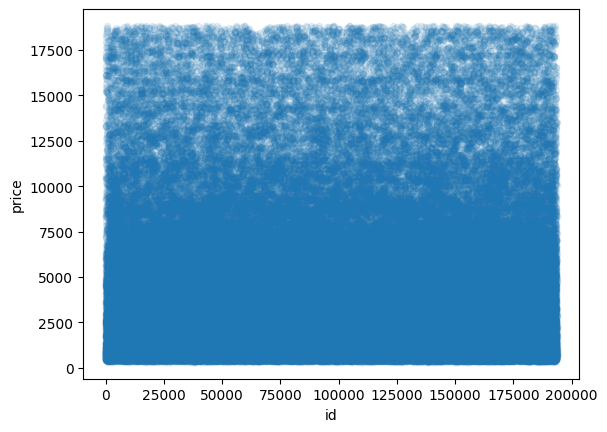

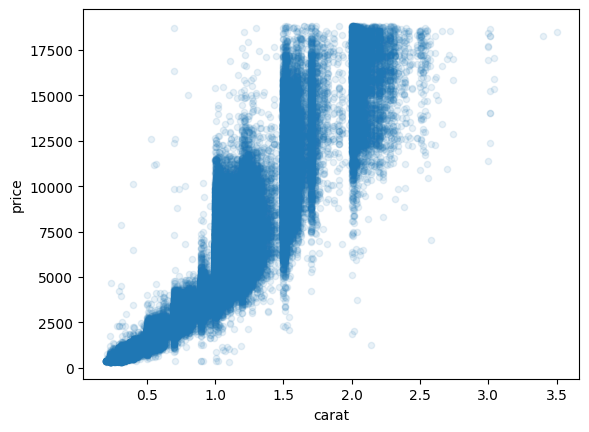

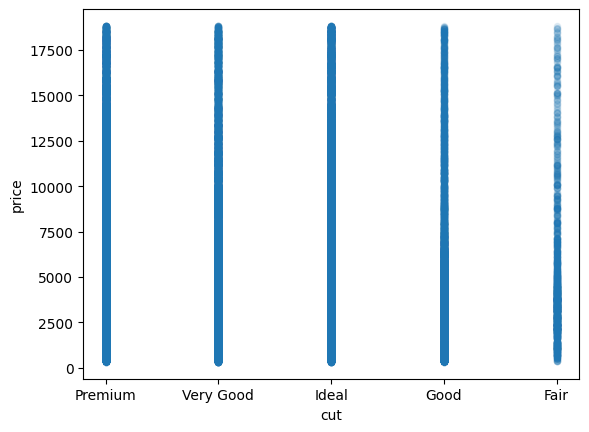

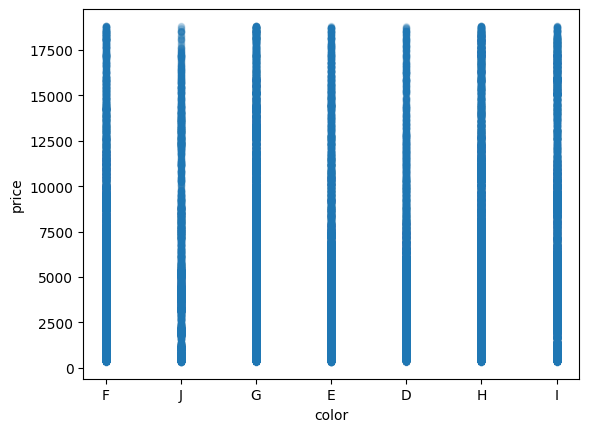

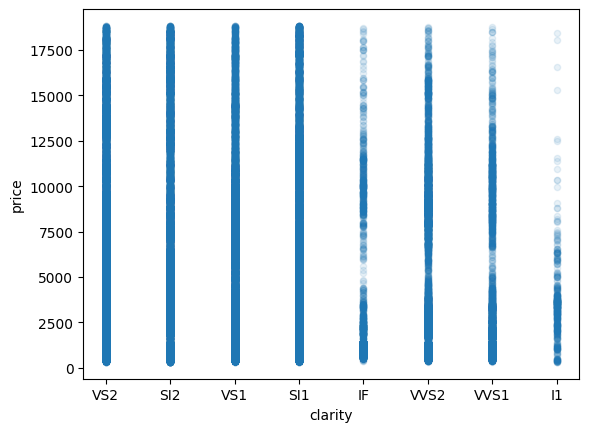

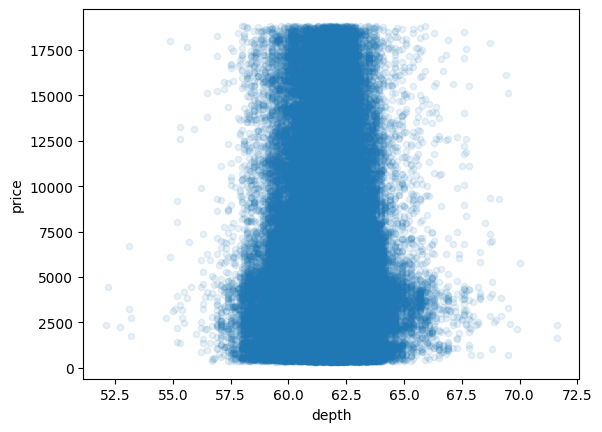

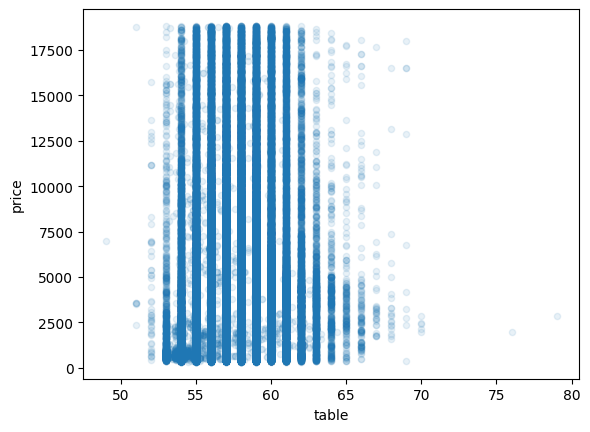

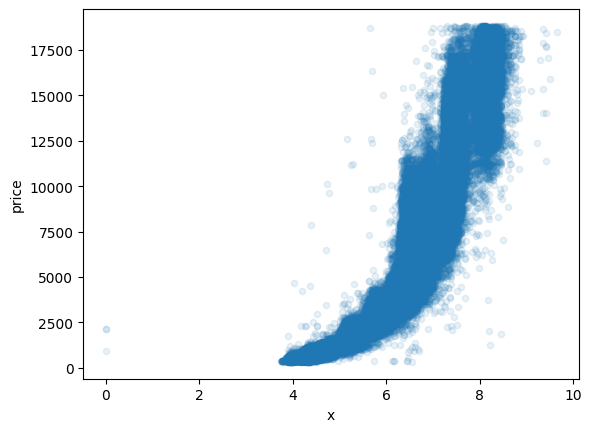

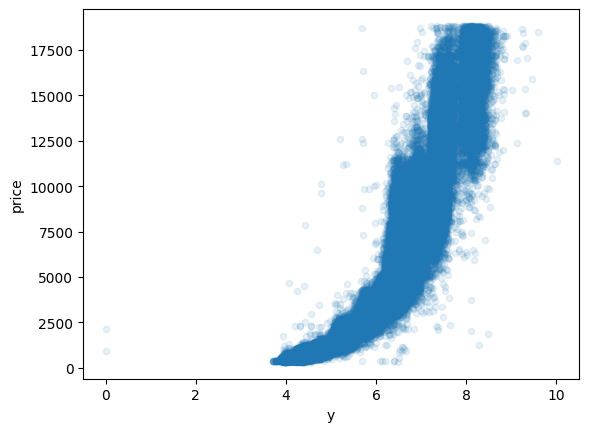

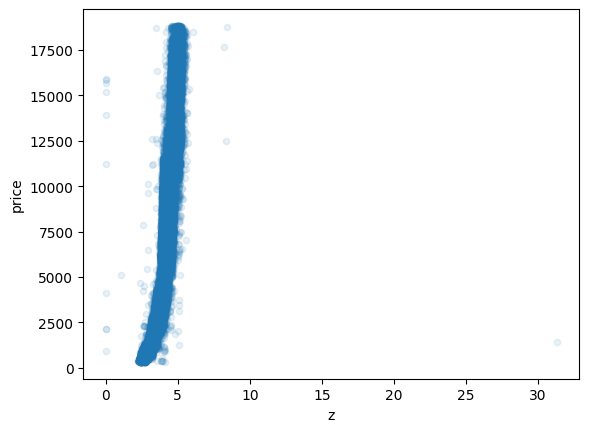

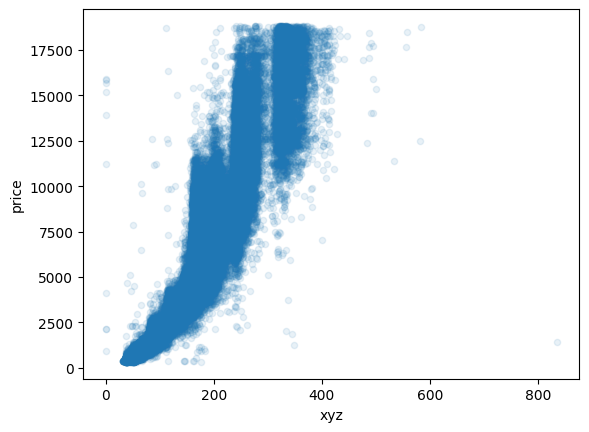

In [94]:
# show a plot of the correlation between every column against Attrition
for column in employee_data.columns:
    if column != "price":
        employee_data.plot.scatter(x=column, y="price", alpha=0.1)

# solution 1 , guess m and b

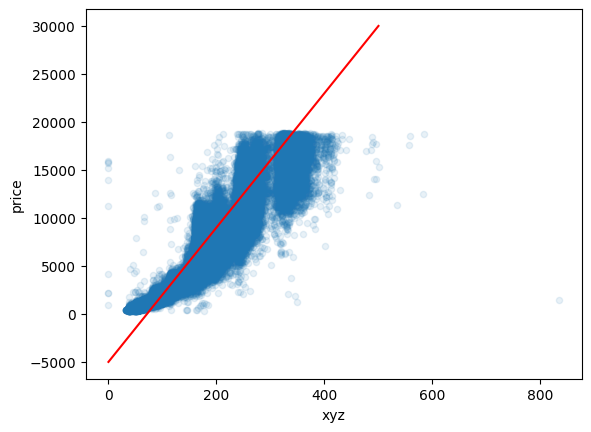

In [35]:
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)
# add a line to the plot to show the correlation
m = 70
b = -5000
x = np.linspace(0, 500, 100)
y = x * m + b
plt.plot(x, y, '-r', label='y=1x+0')

In [39]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
test_data['xyz_me'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# print 5 rows
print(test_data['xyz_me'].head())
test_data['price_me'] = (test_data['xyz_me'] * m) + b
# print 5 rows
print(test_data['price_me'].head())

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz_me, dtype: float64
0    11972.57835
1    18135.58520
2     2987.90650
3    -1335.79274
4    14438.48935
Name: price_me, dtype: float64


In [40]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission.csv', index=False)

In [41]:
# check the submission file rows
submission = pd.read_csv("submission.csv")
print(submission.shape)

(129050, 2)


In [44]:
employee_data['price_me'] = (employee_data['xyz'] * m) + b
# print 5 rows
print(employee_data['price_me'].head())

0    11972.57835
1    18135.58520
2     2987.90650
3    -1335.79274
4    14438.48935
Name: price_me, dtype: float64


2652545.1744720177


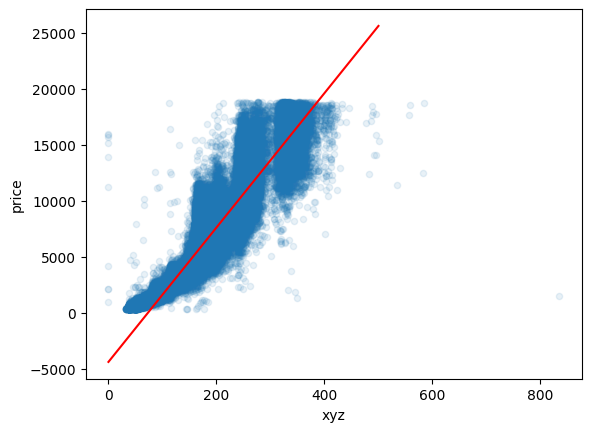

In [82]:
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)
# add a line to the plot to show the correlation
# 60-70
m = 60
b = -4400
x = np.linspace(0, 500, 100)
y = x * m + b
plt.plot(x, y, '-r', label='y=1x+0')


employee_data['price_me'] = (employee_data['xyz'] * m) + b
print(mean_squared_error(employee_data['price'], employee_data['price_me']))

In [84]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
test_data['xyz_me'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# print 5 rows
print(test_data['xyz_me'].head())
test_data['price_me'] = (test_data['xyz_me'] * m) + b
# print 5 rows
print(test_data['price_me'].head())

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz_me, dtype: float64
0    10147.92430
1    15430.50160
2     2446.77700
3    -1259.25092
4    12261.56230
Name: price_me, dtype: float64


In [85]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_2.csv', index=False)

# linear function with algo

In [62]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
test_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']

In [73]:
# add X_train with xyz  and y_train
X_train = employee_data['xyz']
y_train = employee_data['price']
m = 0
b = 0
print(X_train.head())
print(y_train.head())

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz, dtype: float64
0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64


In [68]:
def f_cost_2(x,y,m,b):
  c = x.shape[0]
  total_cost = 0
  for i in range(c):
    f_mb = m*x[i] + b
    cost = (f_mb - y[i])**2
    # cost = abs(f_mb - y[i])
    total_cost += cost

  # return total_cost
  return (1/(2*c)) * total_cost


print(f_cost_2(X_train,y_train,2,2))

14459967.398180492


In [87]:
def derivada_wrt_m_b(x,y,m,b):
  c = x.shape[0]
  dj_dm = 0
  dj_db = 0
  for i in range(c):

    # derivative with respect to b
    # dj_db_i = 2 * (x[i]*m+b - y[i])
    dj_db_i =  ((x[i]*m+b - y[i])) / c

    # derivative with respect to m
    # dj_dm_i = 2 * (x[i]*m+b - y[i]) * x[i]
    dj_dm_i = (dj_db_i * x[i])


    dj_dm = dj_dm + dj_dm_i
    dj_db = dj_db + dj_db_i

  return dj_dm, dj_db

In [88]:
res1, res2 = derivada_wrt_m_b(X_train,y_train,2,2)
print(res1)
print(res2)

-751437.6136173221
-3709.6026532286855


In [89]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b, f_cost_2):
  # initialize the weights
  w_out = w_in
  b_out = b_in
  J_history = []
  p_history = []

  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db
    
    if i% math.ceil(num_iters/10) == 0:
      J_history.append(f_cost_2(x, y, w_out , b_out))
      p_history.append([w_out, b_out])

      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
  return w_out, b_out, J_history, p_history

In [90]:
w, b, J_history,p_history = gradient_descent(X_train,y_train,m,b,0.00001,100,derivada_wrt_m_b,  f_cost_2)
print(w, b)

# 35.89022074670168 -0.44003668637067206

Iteration    0: Cost 10380762.91   
Iteration   10: Cost 1788170.21   
Iteration   20: Cost 1731156.39   
Iteration   30: Cost 1730736.10   
Iteration   40: Cost 1730691.04   
Iteration   50: Cost 1730648.47   
Iteration   60: Cost 1730605.92   
Iteration   70: Cost 1730563.38   
Iteration   80: Cost 1730520.83   
Iteration   90: Cost 1730478.29   
35.89022074670168 -0.44003668637067206


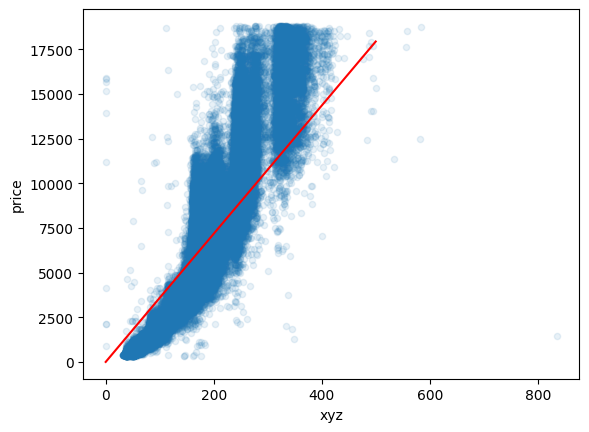

In [95]:
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)
# add a line to the plot to show the correlation
m = 35.89
b = -0.44
x = np.linspace(0, 500, 100)
y = x * m + b
plt.plot(x, y, '-r', label='y=1x+0')

# no linear function

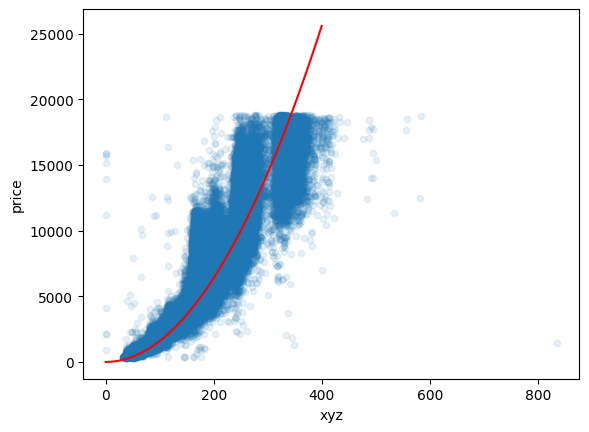

In [111]:
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)

x = np.linspace(0, 400, 100)
a = 0.16
b = 0
y = a*(x**2) + b

plt.plot(x, y, '-r', label='y=1x+0')

employee_data['price_me'] = a * (employee_data['xyz']**2) + b
# print(mean_squared_error(employee_data['price'], employee_data['price_me']))

In [152]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
test_data['xyz_me'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# print 5 rows
print(test_data['xyz_me'].head())
test_data['price_me'] = (test_data['xyz_me'] ** 2) *a
# print 5 rows
print(test_data['price_me'].head())

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz_me, dtype: float64
0     9465.105092
1    17586.959941
2     2096.504223
3      441.153631
4    12415.231384
Name: price_me, dtype: float64


In [153]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_3.csv', index=False)

# non linear function with algotih optimization

In [ ]:
# function
# y = a * x^2 + b

# add X_train with xyz  and y_train
X_train = employee_data['xyz']
y_train = employee_data['price']
m = 0
b = 0
print(X_train.head())
print(y_train.head())


In [98]:
def f_cost_2(x,y,m,b):
  c = x.shape[0]
  total_cost = 0
  for i in range(c):
    f_mb = m*(x[i])**2 + b
    cost = (f_mb - y[i])**2
    # cost = abs(f_mb - y[i])
    total_cost += cost

  # return total_cost
  return (1/(2*c)) * total_cost


print(f_cost_2(X_train,y_train,0.16,0))

1120126.3635772264


In [100]:
def derivada_wrt_m_b(x,y,m,b):
  c = x.shape[0]
  dj_dm = 0
  dj_db = 0
  for i in range(c):
    # derivative with respect to m
    # dj_dm_i = 2 * (x[i]*m+b - y[i]) * x[i]
    dj_dm_i = (( ((x[i])**2) * m + b - y[i]) * (x[i])**2) / c
    # derivative with respect to b
    # dj_db_i = 2 * (x[i]*m+b - y[i])
    dj_db_i =  (( (x[i]**2) * m + b - y[i])) / c

    dj_dm = dj_dm + dj_dm_i
    dj_db = dj_db + dj_db_i

  return dj_dm, dj_db


res1, res2 = derivada_wrt_m_b(X_train,y_train,0.16,0)
print(res1)
print(res2)

-110486.67874781444
-420.0582190799012


In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b, f_cost_2):
  # initialize the weights
  w_out = w_in
  b_out = b_in
  J_history = []
  p_history = []

  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db
  
    
    if i% math.ceil(num_iters/10) == 0:
      J_history.append(f_cost_2(x, y, w_out , b_out))
      p_history.append([w_out, b_out])
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
  return w_out, b_out, J_history, p_history

In [108]:
w, b, J_history,p_history = gradient_descent(X_train,y_train,m,b,0.000000001,30,derivada_wrt_m_b,  f_cost_2)
print(w, b)
# 0.16010348223812207 -0.44134705206529284

Iteration    0: Cost 19541966356.00   
Iteration    3: Cost 1477354.02   
Iteration    6: Cost 1120312.16   
Iteration    9: Cost 1120305.63   
Iteration   12: Cost 1120305.63   
Iteration   15: Cost 1120305.63   
Iteration   18: Cost 1120305.63   
Iteration   21: Cost 1120305.63   
Iteration   24: Cost 1120305.63   
Iteration   27: Cost 1120305.63   
0.16010348223812207 -0.44134705206529284


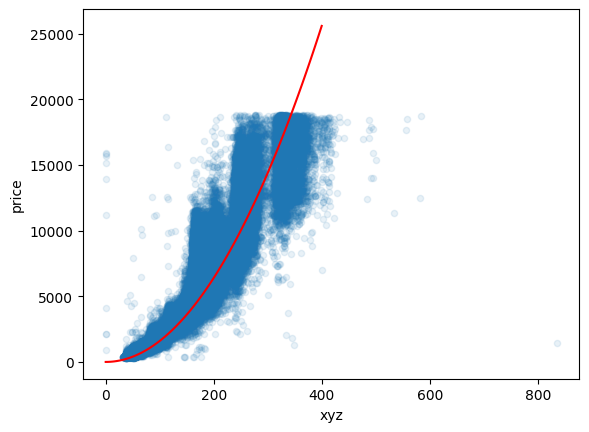

In [112]:
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)

x = np.linspace(0, 400, 100)
a = 0.160
b = -0.44
y = a*(x**2) + b

plt.plot(x, y, '-r', label='y=1x+0')


# non linear function with algo optimization (rigth way)

In [66]:
X_train_raw = employee_data['xyz']
y_train = employee_data['price']

# reshape X_train like a matrix with 1 column and n rows
X_train = X_train_raw.values.reshape(-1,1)
print(X_train.shape)

# feature engineering
X_train_eng = X_train**2
print(X_train_eng)

# reshape y_train as numpy array
y_train = np.array(y_train)
print(y_train)

w_init = 0
b_init = 0

(193573, 1)
[[ 58789.47262181]
 [109235.77602989]
 [ 13021.7653577 ]
 ...
 [ 14175.71221924]
 [  3152.28404449]
 [ 12964.02764058]]
[13619 13387  2772 ...  3036   681  2258]


In [37]:
def cost_function(x, y, m, b):
    c = x.shape[0]
    total_cost = 0
    # print(c)
    for i in range(c):
        # print(x[i])
        # print(m)
        f_mb = np.dot(x[i] , m) + b
        cost = (f_mb - y[i])**2
        # cost = abs(f_mb - y[i])
        total_cost = total_cost + cost

    total_cost = total_cost / (2 * c)    #scalar
    return total_cost

print(cost_function(X_train, y_train, w_init, b_init))

[16015142.65118327]


In [39]:
def multiple_derivada_wrt_m_b(x,y,m,b):
  o,p = x.shape           #(number of examples, number of features)
  dj_dm = np.zeros((p,))
  dj_db = 0

  for i in range(o):
    dj_db_i = (np.dot(x[i], m) + b) - y[i]
    for j in range(p):
      # dj_dm_i = ((np.dot(x[i], m) + b) - y[i]) * x[i,j]
      dj_dm_i = (dj_db_i) * x[i,j]
      dj_dm[j] = dj_dm[j] + dj_dm_i
    dj_db = dj_db + dj_db_i

  dj_dm = dj_dm / o
  dj_db = dj_db / o
  return dj_dm, dj_db

In [40]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b,cost_function):
  # initialize the weights
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  # p_history = []

  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db

    # p_history.append([w_out, b_out])
    if i% math.ceil(num_iters/10) == 0:
      counter = len(J_history)
      J_history.append(cost_function(x, y, w_out , b_out))
      print(f"Iteration {i:4}: Cost {float(J_history[counter])}")

  # return w_out, b_out, J_history, p_history
  # return w_out, b_out, J_history
  return w_out, b_out

In [52]:
w, b = gradient_descent(X_train_eng,y_train,w_init,b_init,0.000000001,20,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)

Iteration    0: Cost 1512436.8256353866
Iteration    2: Cost 1120393.270725578
Iteration    4: Cost 1120121.298838463
Iteration    6: Cost 1120121.1098148837
Iteration    8: Cost 1120121.1093346293
Iteration   10: Cost 1120121.1089851575
Iteration   12: Cost 1120121.1086358272
Iteration   14: Cost 1120121.1082864369
Iteration   16: Cost 1120121.107937091
Iteration   18: Cost 1120121.1075877193
[0.16] [0.]


In [86]:
print(np.array(X_train_raw))
print(X_train_eng)
print(w)
print(b[0])
print(np.dot(X_train_eng,w) + b[0])

[242.465405 330.50836  114.11295  ... 119.0618    56.145205 113.859684]
[[ 58789.47262181]
 [109235.77602989]
 [ 13021.7653577 ]
 ...
 [ 14175.71221924]
 [  3152.28404449]
 [ 12964.02764058]]
[0.16]
0.0
[ 9406.31561949 17477.72416478  2083.48245723 ...  2268.11395508
   504.36544712  2074.24442249]


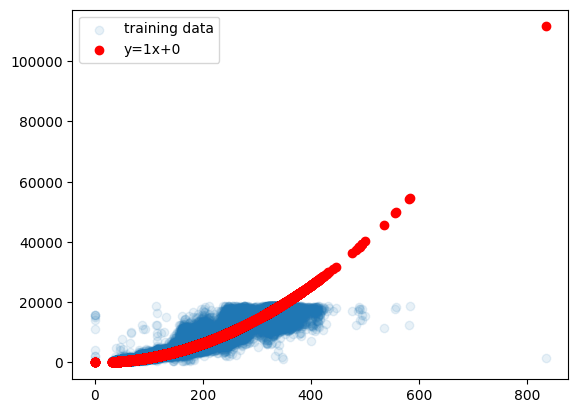

In [88]:
# scaataer plot training ddata
plt.scatter(np.array(X_train_raw), y_train, alpha=0.1, label='training data')

# create number from 0 to 100
# x = np.linspace(0, 40, 100)
# plt.plot(x, x**2,color='red', label='y=1x+0')

plt.scatter(np.array(X_train_raw), np.dot(X_train_eng,w) + b[0],color='red', label='y=1x+0')

plt.legend()    # show the legend


# multiple linear regresion 2 FEATURES

In [34]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
print(employee_data['xyz'][:5])
print(employee_data['carat'][:5])


In [35]:
# convert the 2 columns to numpy arrays andd grup them every row like this [[1,2], [3,4]]
X_train = np.array([employee_data['xyz'], employee_data['carat']]).T
print(X_train[:5])

# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0])
b_init = 0
print(w_init)
print(b_init)

[[2.42465405e+02 1.52000000e+00]
 [3.30508360e+02 2.03000000e+00]
 [1.14112950e+02 7.00000000e-01]
 [5.23458180e+01 3.20000000e-01]
 [2.77692705e+02 1.70000000e+00]]
[13619 13387  2772   666 14453]
[0 0]
0


<Axes: xlabel='carat', ylabel='price'>

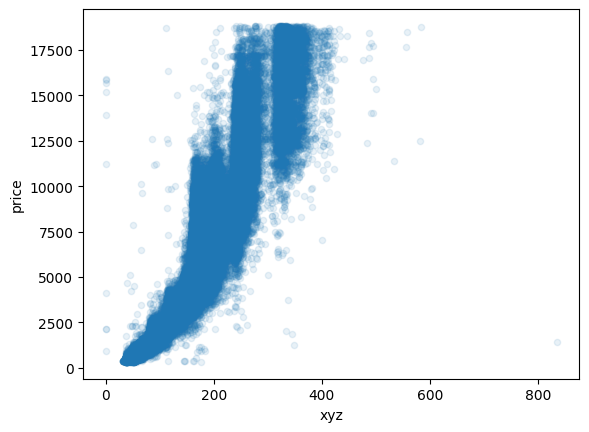

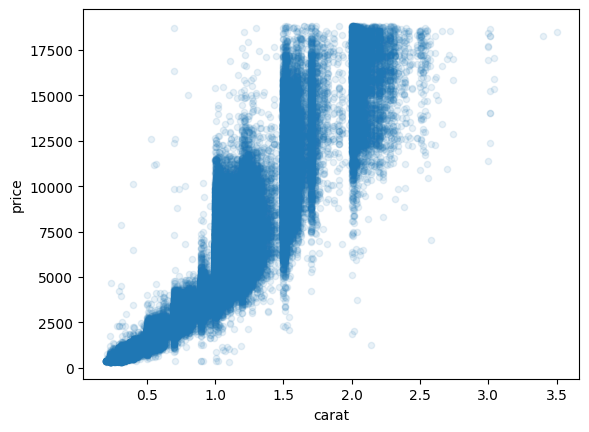

In [36]:
# plot both columns 
employee_data.plot.scatter(x="xyz", y="price", alpha=0.1)
employee_data.plot.scatter(x="carat", y="price", alpha=0.1)
# employee_data.plot.scatter(x="carat", y="xyz", alpha=0.1)


In [37]:
def cost_function(x, y, m, b):
    c = x.shape[0]
    total_cost = 0
    for i in range(c):
        # print(x[i])
        # print(m)
        f_mb = np.dot(x[i] , m) + b
        cost = (f_mb - y[i])**2
        # cost = abs(f_mb - y[i])
        total_cost = total_cost + cost

    total_cost = total_cost / (2 * c)    #scalar
    return total_cost

In [38]:
print(cost_function(X_train, y_train, w_init, b_init))

16015142.651183274


In [39]:
def multiple_derivada_wrt_m_b(x,y,m,b):
  o,p = x.shape           #(number of examples, number of features)
  dj_dm = np.zeros((p,))
  dj_db = 0

  for i in range(o):
    dj_db_i = (np.dot(x[i], m) + b) - y[i]
    for j in range(p):
      dj_dm_i = ((np.dot(x[i], m) + b) - y[i]) * x[i,j]
      dj_dm[j] = dj_dm[j] + dj_dm_i
    dj_db = dj_db + dj_db_i

  dj_dm = dj_dm / o
  dj_db = dj_db / o
  return dj_dm, dj_db

In [40]:
res1, res2 = multiple_derivada_wrt_m_b(X_train,y_train,w_init,b_init)
print(res1)
print(res2)

[-796058.88131777   -4899.34934882]
-3969.1554142364894


In [43]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b,cost_function):
  # initialize the weights
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  # p_history = []

  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db

    # p_history.append([w_out, b_out])
    if i% math.ceil(num_iters/10) == 0:
      counter = len(J_history)
      J_history.append(cost_function(x, y, w_out , b_out))
      print(f"Iteration {i:4}: Cost {float(J_history[counter])}")

  # return w_out, b_out, J_history, p_history
  # return w_out, b_out, J_history
  return w_out, b_out

In [51]:
w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00001,100,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)

Iteration    0: Cost 10380584.495394776
Iteration   10: Cost 1788153.1373462768
Iteration   20: Cost 1731152.6644710128
Iteration   30: Cost 1730732.53932794
Iteration   40: Cost 1730687.4806443776
Iteration   50: Cost 1730644.9103650784
Iteration   60: Cost 1730602.358714841
Iteration   70: Cost 1730559.8093216598
Iteration   80: Cost 1730517.2620769734
Iteration   90: Cost 1730474.716979881
[35.89  0.23] -0.44


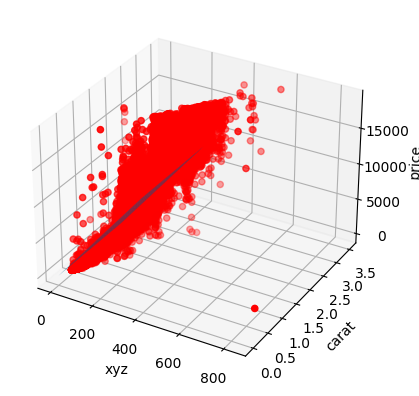

In [55]:
# show the line in the plot in 3d with the 2 features

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(employee_data['xyz'], employee_data['carat'], employee_data['price'], c='r', marker='o')
ax.set_xlabel('xyz')
ax.set_ylabel('carat')
ax.set_zlabel('price')

# add plot line in 3d
x = np.linspace(0, 400, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = w[0] * X + w[1] * Y + b
ax.plot_surface(X, Y, Z, alpha=0.6)
plt.show()


In [60]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)
# Select columns corresponding to features, and preview the data
test_data['xyz_me'] = employee_data['x'] * employee_data['y'] * employee_data['z']

# print 5 rows
# print(test_data['xyz_me'].head())
test_data['price_me'] = (test_data['xyz_me'] * w[0]) + (test_data['carat'] * w[1]) + b
# print 5 rows
print(test_data.head())

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

       xyz_me      price_me  
0  242.465405   8701.723885  
1  330.508360  11861.682140  
2  114.112950   4095.237076  
3   52.345818   1878.327308  
4  277.692705   9966.227182  


In [61]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_4.csv', index=False)

# multiple linear regresion 3 FEATURES

In [11]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
print(employee_data['xyz'][:5])
print(employee_data['carat'][:5])
print(employee_data['table'][:5])

# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([employee_data['xyz'], employee_data['carat'], employee_data['table']]).T
print(X_train[:5])


# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz, dtype: float64
0    1.52
1    2.03
2    0.70
3    0.32
4    1.70
Name: carat, dtype: float64
0    58.0
1    58.0
2    57.0
3    56.0
4    59.0
Name: table, dtype: float64
[[2.42465405e+02 1.52000000e+00 5.80000000e+01]
 [3.30508360e+02 2.03000000e+00 5.80000000e+01]
 [1.14112950e+02 7.00000000e-01 5.70000000e+01]
 [5.23458180e+01 3.20000000e-01 5.60000000e+01]
 [2.77692705e+02 1.70000000e+00 5.90000000e+01]]
[13619 13387  2772   666 14453]
[0 0 0]
0


In [13]:
def cost_function(x, y, m, b):
    c = x.shape[0]
    total_cost = 0
    # print(c)
    for i in range(c):
        # print(x[i])
        # print(m)
        f_mb = np.dot(x[i] , m) + b
        cost = (f_mb - y[i])**2
        # cost = abs(f_mb - y[i])
        total_cost = total_cost + cost

    total_cost = total_cost / (2 * c)    #scalar
    return total_cost

print(cost_function(X_train, y_train, w_init, b_init))

16015142.651183274


In [14]:
def multiple_derivada_wrt_m_b(x,y,m,b):
  o,p = x.shape           #(number of examples, number of features)
  dj_dm = np.zeros((p,))
  dj_db = 0

  for i in range(o):
    dj_db_i = (np.dot(x[i], m) + b) - y[i]
    for j in range(p):
      dj_dm_i = ((np.dot(x[i], m) + b) - y[i]) * x[i,j]
      dj_dm[j] = dj_dm[j] + dj_dm_i
    dj_db = dj_db + dj_db_i

  dj_dm = dj_dm / o
  dj_db = dj_db / o
  return dj_dm, dj_db


res1, res2 = multiple_derivada_wrt_m_b(X_train,y_train,w_init,b_init)
print(res1)
print(res2)


[-796058.88131777   -4899.34934882 -228499.60710068]
-3969.1554142364894


In [15]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b,cost_function):
  # initialize the weights
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  # p_history = []

  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db

    # p_history.append([w_out, b_out])
    if i% math.ceil(num_iters/10) == 0:
      counter = len(J_history)
      J_history.append(cost_function(x, y, w_out , b_out))
      print(f"Iteration {i:4}: Cost {float(J_history[counter])}")

  # return w_out, b_out, J_history, p_history
  # return w_out, b_out, J_history
  return w_out, b_out




w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00001,100,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)

Iteration    0: Cost 10001653.710815687
Iteration   10: Cost 2020975.8323725248
Iteration   20: Cost 1843356.8089591651
Iteration   30: Cost 1712690.844628437
Iteration   40: Cost 1599824.8453943336
Iteration   50: Cost 1502267.0959808917
Iteration   60: Cost 1417941.0788759496
Iteration   70: Cost 1345052.1768657593
Iteration   80: Cost 1282049.1770836508
Iteration   90: Cost 1227591.2572525584
[ 41.73   0.26 -18.45] -0.33


In [16]:
w_init = np.array([41.73  ,0.26 ,-18.45])
b_init = -0.33

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz_me'] = test_data['x'] * test_data['y'] * test_data['z']
test_data['price_me'] = (test_data['xyz_me'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + b

print(test_data.head())

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

       xyz_me     price_me  
0   57.740628  1376.077406  
1  125.937328  4222.034897  
2  117.575290  3928.421452  
3   53.575704  1220.719928  
4  194.329800  7076.164554  


In [17]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_5.csv', index=False)

In [23]:
# [ 51.18   0.41 -45.82] -0.74
w = np.array([51.18, 0.41, -45.82])
b =  -0.74

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz_me'] = test_data['x'] * test_data['y'] * test_data['z']
test_data['price_me'] = (test_data['xyz_me'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + b


print(test_data.head())


output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_10.csv', index=False)

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

       xyz_me     price_me  
0   57.740628   388.648841  
1  125.937328  3879.128147  
2  117.575290  3588.594442  
3   53.575704   221.299831  
4  194.329800  7379.631164  


# linear regression 4 feaatures

In [36]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
print(employee_data['xyz'][:5])
print(employee_data['carat'][:5])
print(employee_data['table'][:5])
print(employee_data['depth'][:5])

# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([employee_data['xyz'], employee_data['carat'], employee_data['table'], employee_data['depth']]).T
print(X_train[:5])


# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz, dtype: float64
0    1.52
1    2.03
2    0.70
3    0.32
4    1.70
Name: carat, dtype: float64
0    58.0
1    58.0
2    57.0
3    56.0
4    59.0
Name: table, dtype: float64
0    62.2
1    62.0
2    61.2
3    61.6
4    62.6
Name: depth, dtype: float64
[[2.42465405e+02 1.52000000e+00 5.80000000e+01 6.22000000e+01]
 [3.30508360e+02 2.03000000e+00 5.80000000e+01 6.20000000e+01]
 [1.14112950e+02 7.00000000e-01 5.70000000e+01 6.12000000e+01]
 [5.23458180e+01 3.20000000e-01 5.60000000e+01 6.16000000e+01]
 [2.77692705e+02 1.70000000e+00 5.90000000e+01 6.26000000e+01]]
[13619 13387  2772   666 14453]
[0 0 0 0]
0


In [19]:
w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00001,100,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)
# [ 45.33   0.28 -13.46 -14.8 ] -0.24

Iteration    0: Cost 9586412.56729801
Iteration   10: Cost 2238933.428509549
Iteration   20: Cost 1895983.620826336
Iteration   30: Cost 1645358.8285128174
Iteration   40: Cost 1456709.4736730938
Iteration   50: Cost 1314701.7536320067
Iteration   60: Cost 1207803.9217414544
Iteration   70: Cost 1127335.3693775192
Iteration   80: Cost 1066761.6915069362
Iteration   90: Cost 1021164.05684291
[ 45.33   0.28 -13.46 -14.8 ] -0.24


In [26]:
w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00001,200,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)
# [ 49.67   0.31 -19.13 -20.86] -0.34

Iteration    0: Cost 9586412.56729801
Iteration   20: Cost 1895983.620826336
Iteration   40: Cost 1456709.4736730938
Iteration   60: Cost 1207803.9217414544
Iteration   80: Cost 1066761.6915069362
Iteration  100: Cost 986839.7715508094
Iteration  120: Cost 941551.4260194381
Iteration  140: Cost 915888.0545812654
Iteration  160: Cost 901345.0953618475
Iteration  180: Cost 893103.4732249408
[ 49.67   0.31 -19.13 -20.86] -0.34


In [38]:
w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00005,100,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)
# [ 51.04   0.33 -21.12 -22.58] -0.36

Iteration    0: Cost 4531833.689230769
Iteration   10: Cost 1250791.7209170316
Iteration   20: Cost 967717.8868920244
Iteration   30: Cost 902117.445531853
Iteration   40: Cost 886911.8776204091
Iteration   50: Cost 883384.2690467241
Iteration   60: Cost 882562.7926901238
Iteration   70: Cost 882368.4170791461
Iteration   80: Cost 882319.370548318
Iteration   90: Cost 882304.0126555645
[ 51.04   0.33 -21.12 -22.58] -0.36


In [27]:
w_init = np.array([49.67, 0.31, -19.13, -20.86])
b_init = -0.34

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz_me'] = test_data['x'] * test_data['y'] * test_data['z']
test_data['price_me'] = (test_data['xyz_me'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + (test_data['depth'] * w[3]) + b

print(test_data.head())

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

       xyz_me     price_me  
0   57.740628   496.887493  
1  125.937328  3873.917782  
2  117.575290  3534.720754  
3   53.575704   323.741518  
4  194.329800  7273.191166  


In [28]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_6.csv', index=False)

# add clarity , 5 features       

In [31]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
# print(employee_data['xyz'][:5])
# print(employee_data['carat'][:5])
# print(employee_data['table'][:5])
# print(employee_data['depth'][:5])
# print(employee_data['clarity'][:5])

# show the unique values of the clarity column
print(employee_data['clarity'].unique())

employee_data['clarity_clean'] = employee_data['clarity'].replace({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})
print(employee_data['clarity_clean'][:5])
# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([employee_data['xyz'],
                    employee_data['carat'],
                    employee_data['table'],
                    employee_data['depth'],
                    employee_data['clarity_clean']]).T
print(X_train[:5])


# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']
0    4
1    2
2    5
3    5
4    4
Name: clarity_clean, dtype: int64
[[2.42465405e+02 1.52000000e+00 5.80000000e+01 6.22000000e+01
  4.00000000e+00]
 [3.30508360e+02 2.03000000e+00 5.80000000e+01 6.20000000e+01
  2.00000000e+00]
 [1.14112950e+02 7.00000000e-01 5.70000000e+01 6.12000000e+01
  5.00000000e+00]
 [5.23458180e+01 3.20000000e-01 5.60000000e+01 6.16000000e+01
  5.00000000e+00]
 [2.77692705e+02 1.70000000e+00 5.90000000e+01 6.26000000e+01
  4.00000000e+00]]
[13619 13387  2772   666 14453]
[0 0 0 0 0]
0


In [32]:
w, b = gradient_descent(X_train,y_train,w_init,b_init,0.00001,200,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)

Iteration    0: Cost 9584980.035802675
Iteration   20: Cost 1895994.899390049
Iteration   40: Cost 1456324.1663035098
Iteration   60: Cost 1207554.3100204025
Iteration   80: Cost 1066765.034782555
Iteration  100: Cost 987058.2182983438
Iteration  120: Cost 941904.5527597548
Iteration  140: Cost 916296.9517463741
Iteration  160: Cost 901746.2136179939
Iteration  180: Cost 893450.1707335841
[ 49.66   0.31 -19.11 -20.84  -0.27] -0.34


In [33]:
w_init = np.array([49.66, 0.31, -19.11, -20.84, -0.27])
b_init = -0.34

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz_me'] = test_data['x'] * test_data['y'] * test_data['z']
test_data['clarity_clean'] = test_data['clarity'].replace({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})
test_data['price_me'] = (test_data['xyz_me'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + (test_data['depth'] * w[3]) + (test_data['clarity_clean'] * w[4]) + b

print(test_data.head())

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

       xyz_me  clarity_clean     price_me  
0   57.740628              4   497.596086  
1  125.937328              2  3874.494408  
2  117.575290              4  3534.763001  
3   53.575704              6   323.917761  
4  194.329800              4  7272.541868  


In [34]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_7.csv', index=False)
# this feaature did not improve the score

# normalization

In [18]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
# print(employee_data['xyz'][:5])
# print(employee_data['carat'][:5])
# print(employee_data['table'][:5])
# print(employee_data['depth'][:5])

# print the min and max values of columns
print("-----------------------------------")
print(employee_data['xyz'].min())
print(employee_data['xyz'].max())
print(employee_data['carat'].min())
print(employee_data['carat'].max())
print(employee_data['table'].min())
print(employee_data['table'].max())
print(employee_data['depth'].min())
print(employee_data['depth'].max())
print("-----------------------------------")


# normalize xyz column
employee_data['xyz'] = (employee_data['xyz'] - np.mean(employee_data['xyz'])) / (employee_data['xyz'].max() - employee_data['xyz'].min())

# normalize carat column
employee_data['carat'] = (employee_data['carat'] - np.mean(employee_data['carat'])) / (employee_data['carat'].max() - employee_data['carat'].min())

# normalize table column
employee_data['table'] = (employee_data['table'] - np.mean(employee_data['table'])) / (employee_data['table'].max() - employee_data['table'].min())

# normalize depth column
employee_data['depth'] = (employee_data['depth'] - np.mean(employee_data['depth'])) / (employee_data['depth'].max() - employee_data['depth'].min())


print("-----------------------------------")
print(employee_data['xyz'].min())
print(employee_data['xyz'].max())
print(employee_data['carat'].min())
print(employee_data['carat'].max())
print(employee_data['table'].min())
print(employee_data['table'].max())
print(employee_data['depth'].min())
print(employee_data['depth'].max())
print("-----------------------------------")
# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([employee_data['xyz'], employee_data['carat'], employee_data['table'], employee_data['depth']]).T
print(X_train[:5])


# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

-----------------------------------
0.0
834.9588000000001
0.2
3.5
49.0
79.0
52.1
71.6
-----------------------------------
-----------------------------------
-0.15423082013616982
0.8457691798638303
-0.17899631945289138
0.8210036805471087
-0.27425582768946793
0.7257441723105321
-0.49849098206772113
0.5015090179322789
-----------------------------------
[[ 0.13616124  0.22100368  0.02574417  0.01945774]
 [ 0.24160711  0.37554914  0.02574417  0.00920133]
 [-0.01756186 -0.02748117 -0.00758916 -0.03182432]
 [-0.09153812 -0.14263268 -0.04092249 -0.01131149]
 [ 0.1783517   0.27554914  0.05907751  0.03997056]]
[13619 13387  2772   666 14453]
[0 0 0 0]
0


In [19]:
def cost_function(x, y, m, b):
    c = x.shape[0]
    total_cost = 0
    # print(c)
    for i in range(c):
        # print(x[i])
        # print(m)
        f_mb = np.dot(x[i] , m) + b
        cost = (f_mb - y[i])**2
        # cost = abs(f_mb - y[i])
        total_cost = total_cost + cost

    total_cost = total_cost / (2 * c)    #scalar
    return total_cost

print(cost_function(X_train, y_train, w_init, b_init))


16015142.651183274


In [20]:
def multiple_derivada_wrt_m_b(x,y,m,b):
  o,p = x.shape           #(number of examples, number of features)
  dj_dm = np.zeros((p,))
  dj_db = 0

  for i in range(o):
    dj_db_i = (np.dot(x[i], m) + b) - y[i]
    for j in range(p):
      # dj_dm_i = ((np.dot(x[i], m) + b) - y[i]) * x[i,j]
      dj_dm_i = (dj_db_i) * x[i,j]
      dj_dm[j] = dj_dm[j] + dj_dm_i
    dj_db = dj_db + dj_db_i

  dj_dm = dj_dm / o
  dj_db = dj_db / o
  return dj_dm, dj_db


res1, res2 = multiple_derivada_wrt_m_b(X_train,y_train,w_init,b_init)
print(res1)
print(res2)


[-3.41244877e+02 -5.33632234e+02 -4.51357234e+01 -4.20622856e-01]
-3969.1554142364894


In [17]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b,cost_function):
  # initialize the weights
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  # p_history = []
  n_iters = []
  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db

    # p_history.append([w_out, b_out])
    if i% math.ceil(num_iters/10) == 0:
      counter = len(J_history)
      n_iters.append(i)
      J_history.append(cost_function(x, y, w_out , b_out))
      print(f"Iteration {i:4}: Cost {float(J_history[counter])}")

  # return w_out, b_out, J_history, p_history
  # return w_out, b_out, J_history
  return w_out, b_out, J_history, n_iters


alpha = 0.1
num_iters = 100

w, b, J_history, n_iters = gradient_descent(X_train,y_train,w_init,b_init,alpha,num_iters,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)


Iteration    0: Cost 5020968.562488089
Iteration   10: Cost 4797539.904180331
Iteration   20: Cost 4586243.785829509
Iteration   30: Cost 4386420.701856658
Iteration   40: Cost 4197447.003442093
Iteration   50: Cost 4018732.9469179865
Iteration   60: Cost 3849720.8502014033
Iteration   70: Cost 3689883.3496926907
Iteration   80: Cost 3538721.751967881
Iteration   90: Cost 3395764.47508755
[5240.77 8192.17  622.43   -9.33] 3969.16


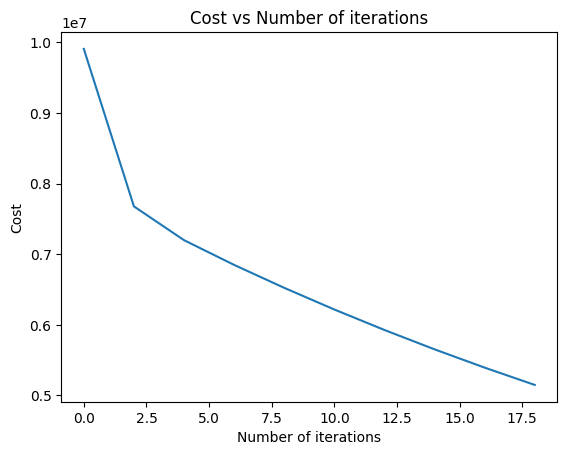

In [30]:
# graph J_history against n_iters
plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()
# 0.5 Iteration   18: Cost 5148448.543175557

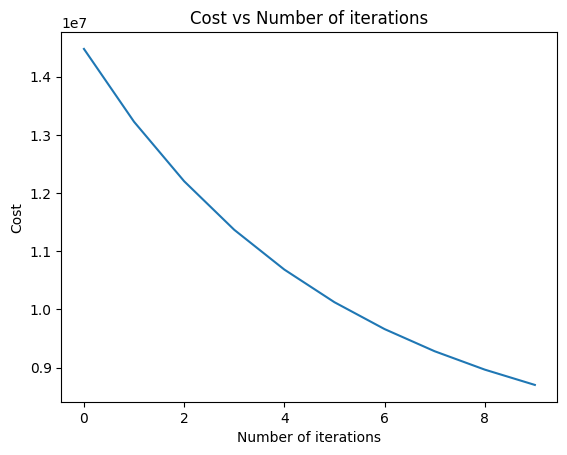

In [26]:
# 0.1 Iteration    9: Cost 8702975.50606133
plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()

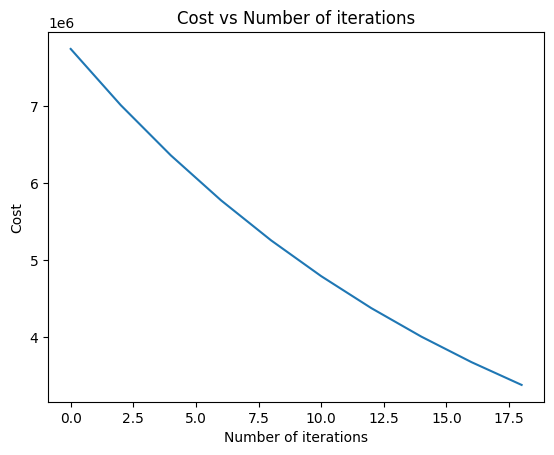

In [28]:
# 0.1 Iteration   18: Cost 3375986.8322166186
plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()


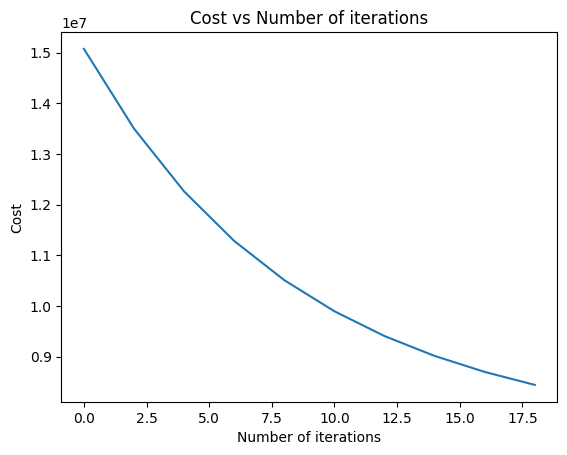

In [32]:
# 0.06 Iteration   18: Cost 8442574.036739726
plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()


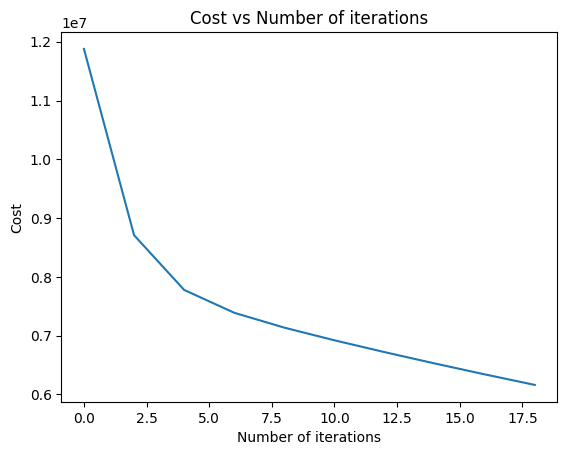

In [34]:
# 0.03 Iteration   18: Cost 6162067.064954999
plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()


In [ ]:
# 0.1 Iteration   90: Cost 5257226.368205248
# [ 2.98266e+03  4.66334e+03  3.75060e+02 -6.00000e-01] 3969.05

plt.plot(n_iters, J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations")
plt.show()


# predicting data after normalization

[5415.43191858 6450.64524361 3785.68761341 3015.53659768 5808.12542312]


/Users/luis/Documents/Projects/auto/playground-series-s3e6/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


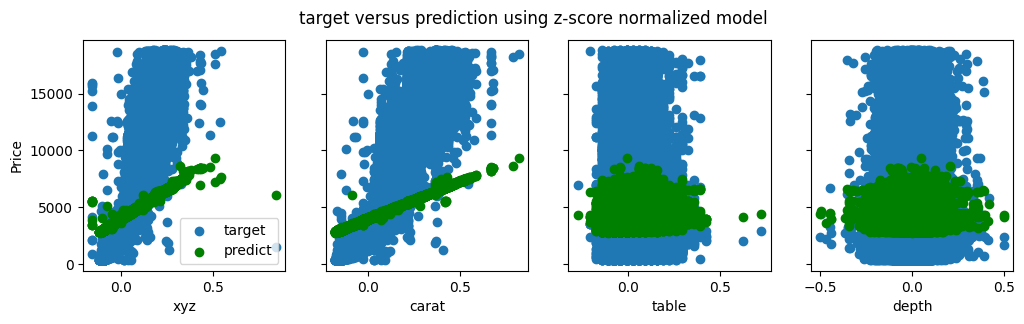

In [5]:
# check y_train against the predicted values

# [ 2.98266e+03  4.66334e+03  3.75060e+02 -6.00000e-01]
w_init = np.array([ 2.98266e+03 , 4.66334e+03, 3.75060e+02, -6.00000e-01])
b_init = 3969.05

y_pred = np.dot(X_train, w_init) + b_init
print(y_pred[:5])

X_features = ['xyz', 'carat', 'table', 'depth']

# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='green', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [10]:
# [ 2.98266e+03  4.66334e+03  3.75060e+02 -6.00000e-01]
w = np.array([ 2.98266e+03 , 4.66334e+03, 3.75060e+02, -6.00000e-01])
b = 3969.05


test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz'] = test_data['x'] * test_data['y'] * test_data['z']

# normalize xyz column
test_data['xyz'] = (test_data['xyz'] - np.mean(test_data['xyz'])) / (test_data['xyz'].max() - test_data['xyz'].min())

# normalize carat column
test_data['carat'] = (test_data['carat'] - np.mean(test_data['carat'])) / (test_data['carat'].max() - test_data['carat'].min())

# normalize table column
test_data['table'] = (test_data['table'] - np.mean(test_data['table'])) / (test_data['table'].max() - test_data['table'].min())

# normalize depth column
test_data['depth'] = (test_data['depth'] - np.mean(test_data['depth'])) / (test_data['depth'].max() - test_data['depth'].min())


test_data['price_me'] = (test_data['xyz'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + (test_data['depth'] * w[3]) + b

print(test_data.head())

       id     carat        cut color clarity     depth     table     x     y  \
0  193573 -0.102153      Ideal     D     VS2  0.027556 -0.065243  4.51  4.54   
1  193574 -0.004478  Very Good     F     SI2  0.056292 -0.065243  5.83  5.87   
2  193575 -0.018432      Ideal     I     VS2  0.004568 -0.223137  5.77  5.74   
3  193576 -0.106804      Ideal     G    VVS2 -0.012674 -0.117874  4.44  4.42   
4  193577  0.095522  Very Good     I     VS2  0.050545 -0.065243  6.75  6.79   

      z       xyz     price_me  
0  2.82 -0.083618  3218.786278  
1  3.68 -0.003073  3914.496344  
2  3.55 -0.012949  3760.780350  
3  2.73 -0.088537  3162.708577  
4  4.24  0.077703  4621.761728  


In [11]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_8.csv', index=False)

# colab trainning

In [21]:
# alpha = 0.1
# num_iters = 1000
# [11547.06 18013.81   628.38  -212.79] 3969.16
w = np.array([ 11547.06, 18013.81,  628.38,  -212.79])
b = 3969.16


test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

# Select columns corresponding to features and multiply them by the weights
test_data['xyz'] = test_data['x'] * test_data['y'] * test_data['z']

# normalize xyz column
test_data['xyz'] = (test_data['xyz'] - np.mean(test_data['xyz'])) / (test_data['xyz'].max() - test_data['xyz'].min())

# normalize carat column
test_data['carat'] = (test_data['carat'] - np.mean(test_data['carat'])) / (test_data['carat'].max() - test_data['carat'].min())

# normalize table column
test_data['table'] = (test_data['table'] - np.mean(test_data['table'])) / (test_data['table'].max() - test_data['table'].min())

# normalize depth column
test_data['depth'] = (test_data['depth'] - np.mean(test_data['depth'])) / (test_data['depth'].max() - test_data['depth'].min())


test_data['price_me'] = (test_data['xyz'] * w[0]) + (test_data['carat'] * w[1]) + (test_data['table'] * w[2]) + (test_data['depth'] * w[3]) + b

print(test_data.head())

output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_9.csv', index=False)

       id     carat        cut color clarity     depth     table     x     y  \
0  193573 -0.102153      Ideal     D     VS2  0.027556 -0.065243  4.51  4.54   
1  193574 -0.004478  Very Good     F     SI2  0.056292 -0.065243  5.83  5.87   
2  193575 -0.018432      Ideal     I     VS2  0.004568 -0.223137  5.77  5.74   
3  193576 -0.106804      Ideal     G    VVS2 -0.012674 -0.117874  4.44  4.42   
4  193577  0.095522  Very Good     I     VS2  0.050545 -0.065243  6.75  6.79   

      z       xyz     price_me  
0  2.82 -0.083618  1116.595922  
1  3.68 -0.003073  3800.027380  
2  3.55 -0.012949  3346.419993  
3  2.73 -0.088537   951.497955  
4  4.24  0.077703  6535.358919  


colab 3 feats

In [24]:
employee_data = pd.read_csv("train.csv")
employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']
# employee_data['xyz']
# employee_data['carat']
print(employee_data['xyz'][:5])
print(employee_data['carat'][:5])
print(employee_data['table'][:5])

# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([employee_data['xyz'], employee_data['carat'], employee_data['table']]).T
print(X_train[:5])


# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

0    242.465405
1    330.508360
2    114.112950
3     52.345818
4    277.692705
Name: xyz, dtype: float64
0    1.52
1    2.03
2    0.70
3    0.32
4    1.70
Name: carat, dtype: float64
0    58.0
1    58.0
2    57.0
3    56.0
4    59.0
Name: table, dtype: float64
[[2.42465405e+02 1.52000000e+00 5.80000000e+01]
 [3.30508360e+02 2.03000000e+00 5.80000000e+01]
 [1.14112950e+02 7.00000000e-01 5.70000000e+01]
 [5.23458180e+01 3.20000000e-01 5.60000000e+01]
 [2.77692705e+02 1.70000000e+00 5.90000000e+01]]
[13619 13387  2772   666 14453]
[0 0 0]
0


[ 9751.7026279  14257.9501648   3228.107781     112.53016524
 11508.8896419 ]


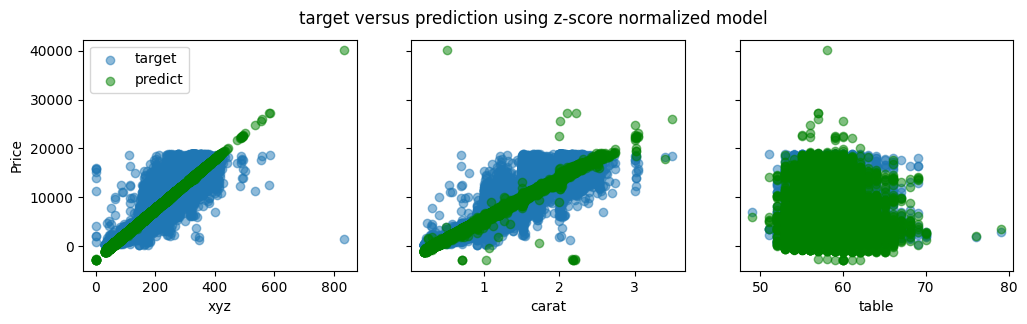

In [27]:
# check y_train against the predicted values

# [ 2.98266e+03  4.66334e+03  3.75060e+02 -6.00000e-01]
# [ 51.18   0.41 -45.82] -0.74

w_init = np.array([ 51.18 , 0.41 ,-45.82])
b_init = -0.74

y_pred = np.dot(X_train, w_init) + b_init
print(y_pred[:5])

X_features = ['xyz', 'carat', 'table']

# plot predictions and targets versus original features
fig,ax=plt.subplots(1,3,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target',alpha=0.5)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='green', label = 'predict',alpha=0.5)
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# non linear function with algo optimization 4 features (rigth way)

In [17]:
employee_data = pd.read_csv("train.csv")

print(employee_data.shape)

# get only 10000 rows
employee_data = employee_data[:100000]
print(employee_data.shape)

employee_data['xyz'] = employee_data['x'] * employee_data['y'] * employee_data['z']

# print(employee_data['xyz'][:5])
# print(employee_data['carat'][:5])
# print(employee_data['depth'][:5])

# feature engineering
xyz_eng = employee_data['xyz']**2
carat_eng = employee_data['carat']**2
depth_eng = employee_data['depth']

# print(xyz_eng[:5])
# print(carat_eng[:5])
# print(depth_eng[:5])

# normalize xyz column
xyz_nor = (xyz_eng - np.mean(xyz_eng)) / (xyz_eng.max() - xyz_eng.min())
# normalize carat column
carat_nor = (carat_eng - np.mean(carat_eng)) / (carat_eng.max() - carat_eng.min())
# normalize depth column
depth_nor = (depth_eng - np.mean(depth_eng)) / (depth_eng.max() - depth_eng.min())

# print(xyz_nor[:5])
# print(carat_nor[:5])
# print(depth_nor[:5])

# convert the 3 columns to numpy arrays andd grup them every row like this [[1,2,5], [3,4,6]]
X_train = np.array([xyz_nor, carat_nor, depth_nor]).T
print(X_train[:5])

# y_train is the price column
y_train = np.array(employee_data['price'])
print(y_train[:5])

w_init = np.array([0, 0, 0])
b_init = 0
print(w_init)
print(b_init)

X_features = ['xyz', 'carat', 'depth']

(193573, 11)
(100000, 11)
[[ 0.10795859  0.12762951  0.01965405]
 [ 0.25681637  0.28479097  0.00939764]
 [-0.02709351 -0.03039133 -0.031628  ]
 [-0.05743286 -0.06403716 -0.01111518]
 [ 0.16202866  0.17794201  0.04016687]]
[13619 13387  2772   666 14453]
[0 0 0]
0


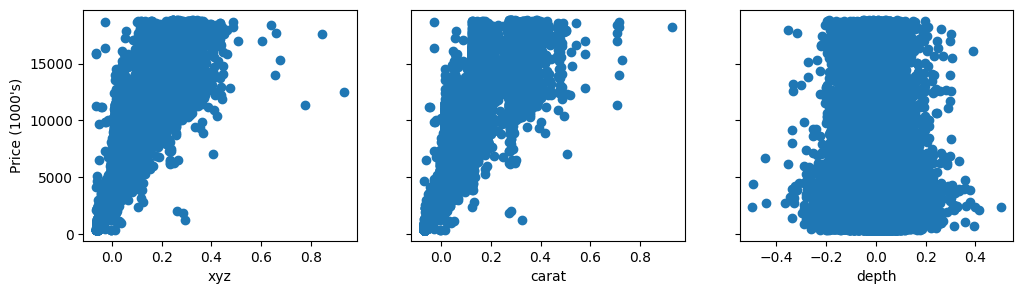

In [18]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [7]:
def cost_function(x, y, m, b):
    c = x.shape[0]
    total_cost = 0
    # print(c)
    for i in range(c):
        # print(x[i])
        # print(m)
        f_mb = np.dot(x[i] , m) + b
        cost = (f_mb - y[i])**2
        # cost = abs(f_mb - y[i])
        total_cost = total_cost + cost

    total_cost = total_cost / (2 * c)    #scalar
    return total_cost

print(cost_function(X_train, y_train, w_init, b_init))


16342155.8489


In [8]:
def multiple_derivada_wrt_m_b(x,y,m,b):
  o,p = x.shape           #(number of examples, number of features)
  dj_dm = np.zeros((p,))
  dj_db = 0

  for i in range(o):
    dj_db_i = (np.dot(x[i], m) + b) - y[i]
    for j in range(p):
      # dj_dm_i = ((np.dot(x[i], m) + b) - y[i]) * x[i,j]
      dj_dm_i = (dj_db_i) * x[i,j]
      dj_dm[j] = dj_dm[j] + dj_dm_i
    dj_db = dj_db + dj_db_i

  dj_dm = dj_dm / o
  dj_db = dj_db / o
  return dj_dm, dj_db


res1, res2 = multiple_derivada_wrt_m_b(X_train,y_train,w_init,b_init)
print(res1)
print(res2)


[-411.58022959 -424.39686562    2.20096505]
-4002.1914


In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, derivada_wrt_m_b,cost_function):
  # initialize the weights
  w_out = copy.deepcopy(w_in)
  b_out = b_in
  J_history = []
  # p_history = []
  n_iters = []
  for i in range(num_iters):
  # calculate the gradient
    dj_dm, dj_db = derivada_wrt_m_b(x, y, w_out, b_out)
  # update the weights
    w_out = w_out - alpha * dj_dm
    b_out = b_out - alpha * dj_db

    # p_history.append([w_out, b_out])
    if i% math.ceil(num_iters/10) == 0:
      counter = len(J_history)
      n_iters.append(i)
      J_history.append(cost_function(x, y, w_out , b_out))
      print(f"Iteration {i:4}: Cost {float(J_history[counter])}")

  # return w_out, b_out, J_history, p_history
  # return w_out, b_out, J_history
  return w_out, b_out, J_history, n_iters


alpha = 1
num_iters = 100

w, b, J_history, n_iters = gradient_descent(X_train,y_train,w_init,b_init,alpha,num_iters,multiple_derivada_wrt_m_b,cost_function)
# round to 2 decimal places
w = np.round(w, 2)
b = np.round(b, 2)
print(w, b)


Iteration    0: Cost 7962420.00851805
Iteration   10: Cost 6339388.932965901
Iteration   20: Cost 5091596.136529899
Iteration   30: Cost 4132286.429113142
Iteration   40: Cost 3394762.539616959
Iteration   50: Cost 2827747.69179332
Iteration   60: Cost 2391820.3605992747
Iteration   70: Cost 2056673.3190404093
Iteration   80: Cost 1799006.3980996928
Iteration   90: Cost 1600906.4441775922
[16215.92 18096.91   -70.16] 3973.65


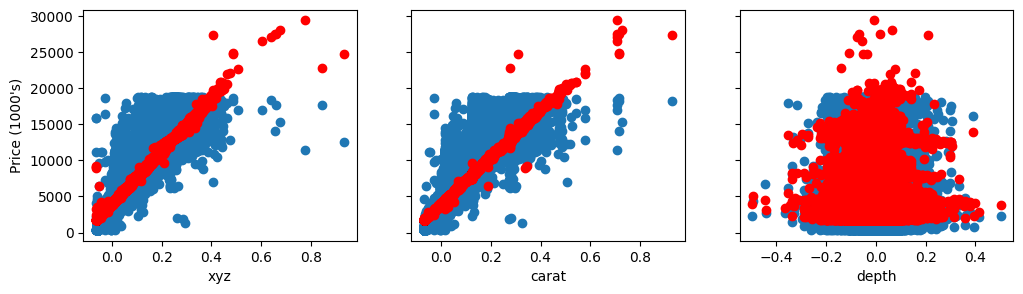

In [20]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], X_train@w + b,c='r')

ax[0].set_ylabel("Price (1000's)")
plt.show()

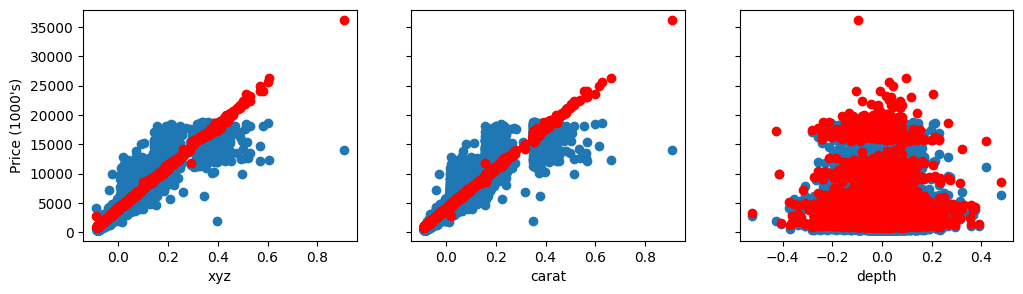

In [16]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], X_train@w + b,c='r')

ax[0].set_ylabel("Price (1000's)")
plt.show()

In [24]:
# w_init = np.array([14784.73, 32010.94, -232 ])
# b_init = 3969.16

w_init = np.array([16215.92, 18096.91, -70.16 ])
b_init = 3973.65

# [16215.92 18096.91   -70.16] 3973.65

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)


# Select columns corresponding to features and multiply them by the weights
test_data['xyz'] = test_data['x'] * test_data['y'] * test_data['z']

# feature engineering
xyz_eng = test_data['xyz']**2
carat_eng = test_data['carat']**2
depth_eng = test_data['depth']

# print(xyz_eng[:5])
# print(carat_eng[:5])
# print(depth_eng[:5])

# normalize xyz column
xyz_nor = (xyz_eng - np.mean(xyz_eng)) / (xyz_eng.max() - xyz_eng.min())
# normalize carat column
carat_nor = (carat_eng - np.mean(carat_eng)) / (carat_eng.max() - carat_eng.min())
# normalize depth column
depth_nor = (depth_eng - np.mean(depth_eng)) / (depth_eng.max() - depth_eng.min())

X_train = np.array([xyz_nor, carat_nor, depth_nor]).T




test_data['price_me'] = ((X_train[:,0]) * w_init[0]) + ((X_train[:,1]) * w_init[1]) + (X_train[:,2] * w_init[2]) + b_init

print(test_data.head())
# 100000

       id  carat        cut color clarity  depth  table     x     y     z  \
0  193573   0.35      Ideal     D     VS2   62.3   56.0  4.51  4.54  2.82   
1  193574   0.77  Very Good     F     SI2   62.8   56.0  5.83  5.87  3.68   
2  193575   0.71      Ideal     I     VS2   61.9   53.0  5.77  5.74  3.55   
3  193576   0.33      Ideal     G    VVS2   61.6   55.0  4.44  4.42  2.73   
4  193577   1.20  Very Good     I     VS2   62.7   56.0  6.75  6.79  4.24   

          xyz     price_me  
0   57.740628  2907.195399  
1  125.937328  3609.738673  
2  117.575290  3487.792112  
3   53.575704  2887.352741  
4  194.329800  4864.136372  


In [26]:
output = pd.DataFrame({'id': test_data.id,
                       'price': test_data.price_me})
output.to_csv('submission_12.csv', index=False)